In [123]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [124]:
df= pd.read_csv('movie_dataset.csv')
df

,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross
0,Bố Già,1972,175 min,"Crime, Drama",9.2,100,1987643,"134,966,411"
1,Câu Chuyện Tokyo,1953,136 min,Drama,8.1,100,67476,NaN
2,Bảy Võ Sĩ Đạo,1954,207 min,"Action, Drama",8.6,100,363320,"269,061"
3,Bố Già Phần II,1974,202 min,"Crime, Drama",9.0,100,1348889,"57,300,000"
4,Chuyện Tình Thế Chiến,1942,102 min,"Drama, Romance, War",8.5,100,600392,"1,024,560"
...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95 min,Drama,7.0,89,2188,"30,209"
996,We the Animals,2018,94 min,Drama,6.9,89,4595,"400,961"
997,David Holzman's Diary,1967,74 min,"Comedy, Drama",6.5,89,1823,NaN
998,Moonrise,1948,90 min,"Crime, Drama, Film-Noir",7.0,89,2938,NaN


## Data Cleaning

In [125]:
(df['ReleaseYear'].unique())

array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', '1989–1990', '1994', '1931', '1952',
       '1993', '1959', '1990', '1945', '1936', '1960', '1975', '1949',
       '1988', '1964', '1979', '1956', '1928', '1939', '1948', '1966',
       '1924', '1976', '1969', '1927', '1937', '1982', '2001', '1958',
       '1991', '1989', '1944', '1920', '1973', '1984', '2016', '1902',
       '2010', '2011', '1946', '1963', '1995–1998', '1961', '1925',
       '1967', 'I 2019', '1940', '1943', '1965', '1929', '1981',
       'II 2018', '2012', '1970', 'I 2015', '2018', '1987', '1971',
       '1921', '1926', '1977', '2008', '1935', '1968', '2003', '1930',
       '1934', '1951', '2013', '1922', 'I 2014', '1984 TV Movie', '2014',
       '2006', '1938', '2000', '1974 TV Movie', '1933', '1983', '2019',
       '1978', '1999', '1947', '2017', '2007 TV Movie', '1923', '2015',
       '1980', '2007', '1932', '2002', 'I 2017', '1995', 'I 2011', '1997',
       '1992

In [126]:
# Handle cases where the year is provided with additional text (e.g., '1984 TV Movie').
# Take only Year from string: 
def take_only_year(input_strings):
    years= []
    for input_string in input_strings:
   # Check if input_string is a string
          parts= input_string.split()
          for part in parts:
             if part.isdigit() and len(part)==4:
                 years.append(int(part))
                 break
    return years

input_strings = ['I 2019', 'II 2018', 'I 2015', 'I 2014', '1984 TV Movie', '1974 TV Movie', '2007 TV Movie', 'I 2017', 'I 2011', 'I 2016', '1977 TV Movie', '2002 TV Special', 'II 2016', '1992 TV Movie', 'III 2015', 'I 2007', '1966 TV Movie', 'II 2011', 'II 2015', 'II 2014', 'I 2008', 'II 2017',
       '2006 TV Movie', 'I 2002', '1988 TV Movie']
new_strings= take_only_year(input_strings)
new_strings

[2019,
 2018,
 2015,
 2014,
 1984,
 1974,
 2007,
 2017,
 2011,
 2016,
 1977,
 2002,
 2016,
 1992,
 2015,
 2007,
 1966,
 2011,
 2015,
 2014,
 2008,
 2017,
 2006,
 2002,
 1988]

In [127]:
# Handle cases where multiple years are provided as a range (e.g., '1989–1990'). 
# Solution: tính trung bình của năm bắt đầu và năm kết thúc trong một dãy năm.
def clean_release_years(release_years):
    cleaned_years= []
    for year_range in release_years:
            start_year, end_year = map(int, year_range.split('–'))
            average_year= start_year + ((end_year- start_year)/2)
            cleaned_years.append(int(average_year))
    return cleaned_years

release_years = ['1989–1990', '1995–1998', '1989–1999']
new_release_year = clean_release_years(release_years)
new_release_year



[1989, 1996, 1994]

In [128]:
def replace_name(a,b):
    df.ReleaseYear.replace(a,b,inplace=True)

replace_name(input_strings,new_strings)
replace_name('1985– ', '1985')
replace_name(release_years, new_release_year)


df['ReleaseYear'].unique()

array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', 1989, '1994', '1931', '1952', '1993',
       '1959', '1990', '1945', '1936', '1960', '1975', '1949', '1988',
       '1964', '1979', '1956', '1928', '1939', '1948', '1966', '1924',
       '1976', '1969', '1927', '1937', '1982', '2001', '1958', '1991',
       '1989', '1944', '1920', '1973', '1984', '2016', '1902', '2010',
       '2011', '1946', '1963', 1996, '1961', '1925', '1967', 2019, '1940',
       '1943', '1965', '1929', '1981', 2018, '2012', '1970', 2015, '2018',
       '1987', '1971', '1921', '1926', '1977', '2008', '1935', '1968',
       '2003', '1930', '1934', '1951', '2013', '1922', 2014, 1984, '2014',
       '2006', '1938', '2000', 1974, '1933', '1983', '2019', '1978',
       '1999', '1947', '2017', 2007, '1923', '2015', '1980', '2007',
       '1932', '2002', 2017, '1995', 2011, '1997', '1992', 2016, 1977,
       '1998', '1986', '2004', '1996', 2002, '2009', 1994, 1992, 1966,


In [129]:
# We need to remove min, change the datatype of duration to minutes (interger)
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [130]:
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand= True)
df['Gross']= df['Gross'].replace(',','')
df['Gross'] = pd.to_numeric(df['Gross'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')  

In [131]:
# df.drop(columns = ['Genre'], inplace= True)

In [132]:
df.dtypes


MovieTitle      object
ReleaseYear     object
Duration         int32
Genre           object
Rating         float64
Metascore        int64
Votes            int64
Gross          float64
Genre_1         object
Genre_2         object
Genre_3         object
dtype: object

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,1.177170e+02,6.129840e+01,13.0,94.00,107.0,127.0,931.0
Rating,1000.0,7.804700e+00,3.995843e-01,5.7,7.50,7.8,8.1,9.3
Metascore,1000.0,8.930000e+01,5.517286e+00,83.0,84.00,88.0,94.0,100.0
Votes,1000.0,1.551179e+05,3.296935e+05,33.0,8510.25,26588.0,110312.0,2852749.0
Gross,576.0,4.284013e+07,1.025510e+08,1392.0,336431.00,3508790.0,27360075.0,936662225.0


There are huge differences between the values, and a machine learning model could here easily interpret `Gross` as the most important attribute, due to larger scale. 
* `=>` We need to standardize them in a way that allows for the use in a linear model.

<Axes: >

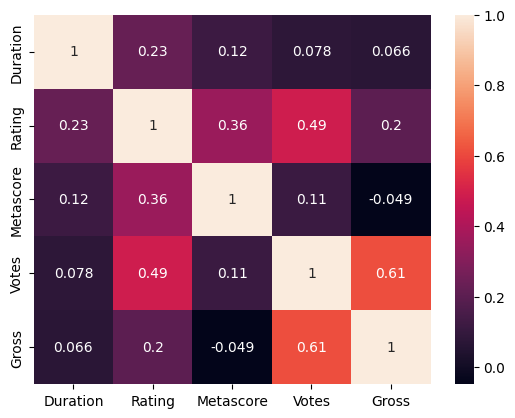

In [134]:
correlationMatrix= df.corr()
sns.heatmap(correlationMatrix, annot= True)

From this corr chart, we cans ee that the corr value of gross with the votes has 0.61 and corr between gross and metascore has -0.049
* This explains that gross is strongly correlated with the votes and metascore is least correlated. 
* => So we cans ay that Votes is directly related for the gross generated 

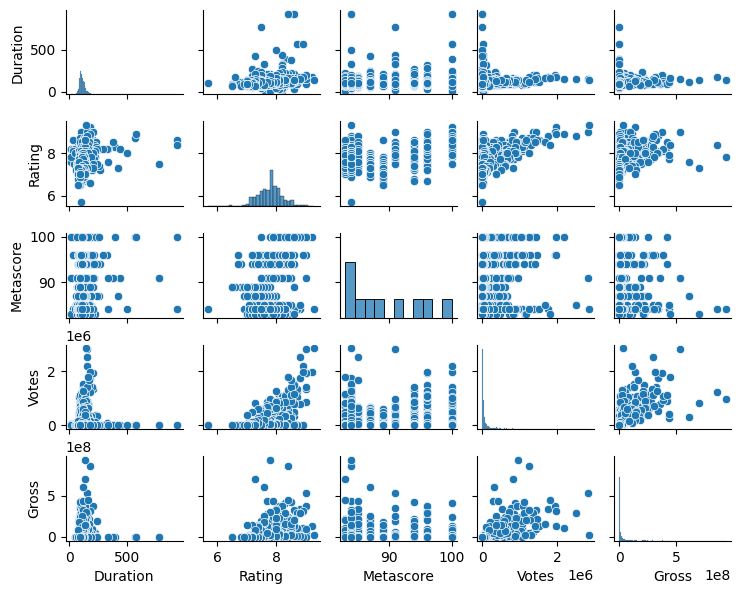

In [135]:
sns.pairplot(df, height = 1.2, aspect= 1.25)

## Predict the null value of Gross column based on release year, duration, genre, rating, and metascore

Text(0.5, 1.0, 'Distribution of Gross')

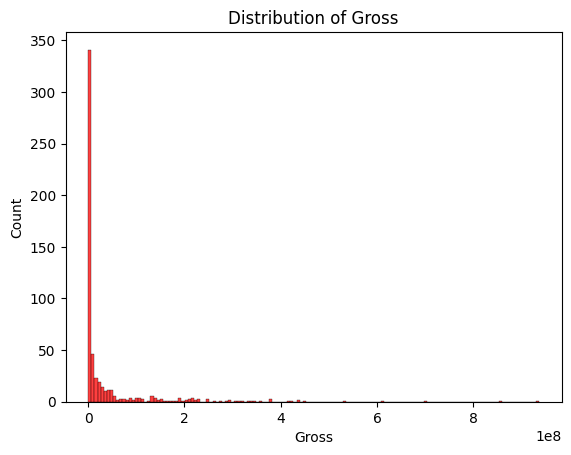

In [136]:
sns.histplot(data= df['Gross'], color= 'red')
plt.title("Distribution of Gross")

Skewed data is not a good fit for modeling in Linear Regression

- Because they may act as an outlier, and we know that outlier is not good for our model performance.
- They have uneven mean, median, mode and by the law of large numbers, normal distribution allows the researcher to make more accurate predictions.
- To linearize the fit as much as possible. The statistical test is usually based on the assumption of normality(normal distribution).

=> Using log-normal distribution.  X is log-normally distributed, then Y = ln(X) has a normal distribution

### Convert categorical variables into numerical variables format using techniques one-hot encoding:

In [137]:
# Concatenate all 'Genre' columns into a single DataFrame
genres_df= pd.concat([df['Genre_1'], df['Genre_2'], df['Genre_3']], axis= 1)
# Reshape the DataFrame to have each genre in a separate row
genres_df = genres_df.melt(value_name='Genre').dropna()  
# Strip whitespace from the 'Genre' column
genres_df['Genre'] = genres_df['Genre'].str.strip()

In [138]:
genres_df

,variable,Genre
0,Genre_1,Crime
1,Genre_1,Drama
2,Genre_1,Action
3,Genre_1,Crime
4,Genre_1,Drama
...,...,...
2989,Genre_3,Sci-Fi
2990,Genre_3,Comedy
2991,Genre_3,Romance
2998,Genre_3,Film-Noir


In [139]:
# One-hot encode the 'Genre' column
one_hot_encoded= pd.get_dummies(genres_df, columns= ['Genre'], dummy_na= True)
one_hot_encoded

,variable,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Genre_1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Genre_1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Genre_1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Genre_1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Genre_1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2990,Genre_3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2991,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2998,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
# Merge the one-hot encoded DataFrame back to the original DataFrame
df= pd.concat([df, one_hot_encoded.drop(columns= ['variable'])], axis= 1)
df.drop(columns= ['Genre'], inplace= True)
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Drop rows with NaN values:
df.dropna(subset= ['MovieTitle'], inplace= True)

In [142]:
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95.0,7.0,89.0,2188.0,30209.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,We the Animals,2018,94.0,6.9,89.0,4595.0,400961.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,NaN,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,NaN,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# Divide Gross column having null values in a new dataframe to apply the model. 
df_null_gross = df[df['Gross'].isnull()]
df_null_gross

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sunset Blvd.,1950,110.0,8.4,100.0,234110.0,NaN,Drama,Film-Noir,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Ordet,1955,126.0,8.2,100.0,17207.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,400 Cú Đấm,1959,99.0,8.1,100.0,126702.0,NaN,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Les enfants du paradis,1945,189.0,8.3,100.0,20960.0,NaN,Drama,Romance,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Jigokumon,1953,89.0,7.1,89.0,4197.0,NaN,Drama,History,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,Trudno byt bogom,2013,177.0,6.6,89.0,6288.0,NaN,Drama,Sci-Fi,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,NaN,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,NaN,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection:  

* 2 independent variables that used to predict the gross is `Votes` and `Rating` because it is highly correlated with the gross variables

### USING LINEAR REGRESSION: 

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error   
# The smaller the mean squared error, the closer you are to finding the line of best fit.
# Tổng bình phương sai số

In [145]:
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95.0,7.0,89.0,2188.0,30209.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,We the Animals,2018,94.0,6.9,89.0,4595.0,400961.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,NaN,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,NaN,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Drop rows with null values in Gross column to train model: 
df= df.dropna(subset= ['Gross'])
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Công Dân Kane,1941,119.0,8.3,100.0,462045.0,1585634.0,Drama,Mystery,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,Ilo Ilo,2013,99.0,7.2,89.0,4968.0,54071.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
990,Shazam!,2019,132.0,7.0,89.0,380610.0,140371656.0,Action,Adventure,Comedy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,Heart of a Dog,2015,75.0,7.0,89.0,2530.0,418571.0,Documentary,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,L'eau froide,1994,95.0,7.0,89.0,2188.0,30209.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

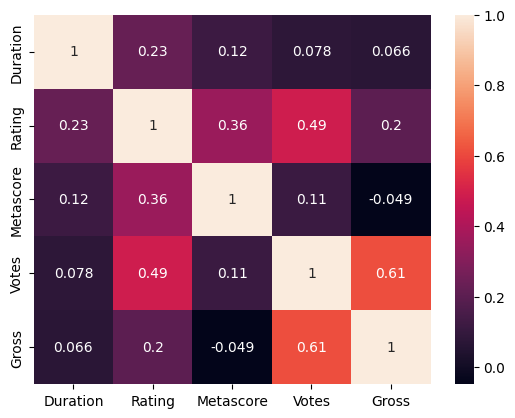

In [147]:
sns.heatmap(correlationMatrix, annot= True)

In [148]:
features= ['Votes', 'Rating']

In [149]:
X= df[features]
y= df['Gross']    # target variables that we need to predict

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.
Feature scaling transforms the features in your dataset so they have a mean of zero and a variance of one This will make it easier to linearly compare features.

In [150]:
# Feature Scaling: 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)


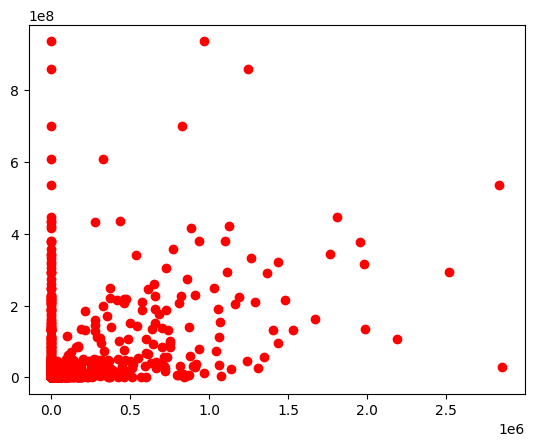

In [151]:
plt.plot(X,y,'ro')

In [152]:
# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state= 42)
# 20% of the data will be reserved for testing, while the remaining 80% will be used for training the model.

In [153]:
X_train.shape, X_test.shape

((460, 2), (116, 2))

In [154]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [155]:
# Predict the gross revenue for the test set:
linear_y_pred= model.predict(X_test)

In [156]:
# Evaluate the model:
linear_mse= mean_squared_error(y_test, linear_y_pred)
print("Mean Square Error: ", linear_mse)

Mean Square Error:  5724587553363798.0


=>  This MSE indicates a very high error in your regression model predictions. This suggests that the model is not accurately capturing the relationship between the independent variables (features) and the target variable (gross revenue).

* Based on R-Square: Coefficient of Determination

In [157]:
from sklearn.metrics import r2_score
linear_R_square= r2_score(y_test, linear_y_pred)
print("Coefficient of determination: ", linear_R_square)

Coefficient of determination:  0.3633512717610763


- The coefficient of determination is a statistical measure that indicates the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (X).
- R_score of 0.3633 means that approximately 36.33% of the variance in the target variable (gross revenue in this case) can be explained by the independent variables (features) included in the model.
- R^2= 0 indicates that the model does not explain any of the variability of the target variable around its mean.
- R^2= 1 indicates that the model perfectly explains all the variability of the target variable around its mean. 
- `=>` higher R^2 values indicate a better fit of the model to the data

Mean Absolute Error (MAE) offers an alternative approach to tackling regression problems. Instead of squaring the error terms, MAE takes the absolute value of the differences between predicted and actual values. This attribute makes MAE inherently robust to outliers. Unlike MSE, MAE treats all errors equally, minimizing the impact of outliers on the loss function. As a result, the model learns to prioritize fitting the majority of the data points accurately.

In [158]:
from sklearn.metrics import mean_absolute_error
linear_mae= mean_absolute_error(y_test,linear_y_pred)
print("Mean Absolue Error: ", linear_mae)

Mean Absolue Error:  40267476.449516036


### DECISION TREE:

In [159]:
from sklearn import tree
decision_tree_model= tree.DecisionTreeRegressor()
decision_tree_model= decision_tree_model.fit(X_train, y_train)

In [160]:
# Predict the gross revenue for the test set:
dtr_y_pred= decision_tree_model.predict(X_test)

In [161]:
dtr_r_square= r2_score(y_test, dtr_y_pred)
dtr_mse= mean_squared_error(y_test, dtr_y_pred)
dtr_mae= mean_absolute_error(y_test,dtr_y_pred)

print("Decision Tree:")
print("Coefficient of determination: ", dtr_r_square)
print("Mean Square Error: ",dtr_mse)
print("Mean Absolue Error: ", dtr_mae)



Decision Tree:
Coefficient of determination:  -0.3792251536406477
Mean Square Error:  1.240165070251185e+16
Mean Absolue Error:  48574451.14655172


In [162]:
# Plot the tree: 
# tree.plot_tree(decision_tree_model)
# [...]

### RIDGE MODEL: 

In [163]:
from sklearn import linear_model
# Create a Ridge regression model
reg= linear_model.Ridge(alpha= 0.5)


reg_model= reg.fit(X_train, y_train)
reg_y_pred= reg_model.predict(X_test)

ridge_r_square= r2_score(y_test, reg_y_pred)
ridge_mse= mean_squared_error(y_test, reg_y_pred)
ridge_mae= mean_absolute_error(y_test,reg_y_pred)

# Print the evaluation metrics
print("\nRidge Regression:")
print("Coefficient of determination: ", ridge_r_square)
print("Mean Square Error: ",ridge_mse)
print("Mean Absolue Error: ", ridge_mae)


Ridge Regression:
Coefficient of determination:  0.36338563290906045
Mean Square Error:  5724278586438484.0
Mean Absolue Error:  40237339.819526605


### RANDOM FOREST REGRESSOR:

In [164]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
rf_r_square = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regression:")
print("Coefficient of determination: ", rf_r_square)
print("Mean Squared Error: ", rf_mse)
print("Mean Absolute Error: ", rf_mae)


Random Forest Regression:
Coefficient of determination:  0.16774685851017224
Mean Squared Error:  7483413951362867.0
Mean Absolute Error:  40944917.325603455


* Comparision the performance of 4 regression models:

In [165]:
# Create a dictionary to store MSE for each model
model_performance = {
    'Linear Regression': {'MSE': linear_mse, 'R_square': linear_R_square, 'MAE': linear_mae},
    'Decision Tree Regression': {'MSE': dtr_mse, 'R_square': dtr_r_square, 'MAE': dtr_r_square},
    'Ridge Regression': {'MSE': ridge_mse, 'R_square': ridge_r_square, 'MAE': ridge_mae},
    'Random Forest Regression':{'MSE': rf_mse, 'R_square': rf_r_square, 'MAE': rf_mae}}

model_performance

{'Linear Regression': {'MSE': 5724587553363798.0,
  'R_square': 0.3633512717610763,
  'MAE': 40267476.449516036},
 'Decision Tree Regression': {'MSE': 1.240165070251185e+16,
  'R_square': -0.3792251536406477,
  'MAE': -0.3792251536406477},
 'Ridge Regression': {'MSE': 5724278586438484.0,
  'R_square': 0.36338563290906045,
  'MAE': 40237339.819526605},
 'Random Forest Regression': {'MSE': 7483413951362867.0,
  'R_square': 0.16774685851017224,
  'MAE': 40944917.325603455}}

In [166]:
# Convert from a dict to DataFrame: 
performance_df= pd.DataFrame(model_performance).T
performance_df

,MSE,R_square,MAE
Linear Regression,5.724588e+15,0.363351,4.026748e+07
Decision Tree Regression,1.240165e+16,-0.379225,-3.792252e-01
Ridge Regression,5.724279e+15,0.363386,4.023734e+07
Random Forest Regression,7.483414e+15,0.167747,4.094492e+07


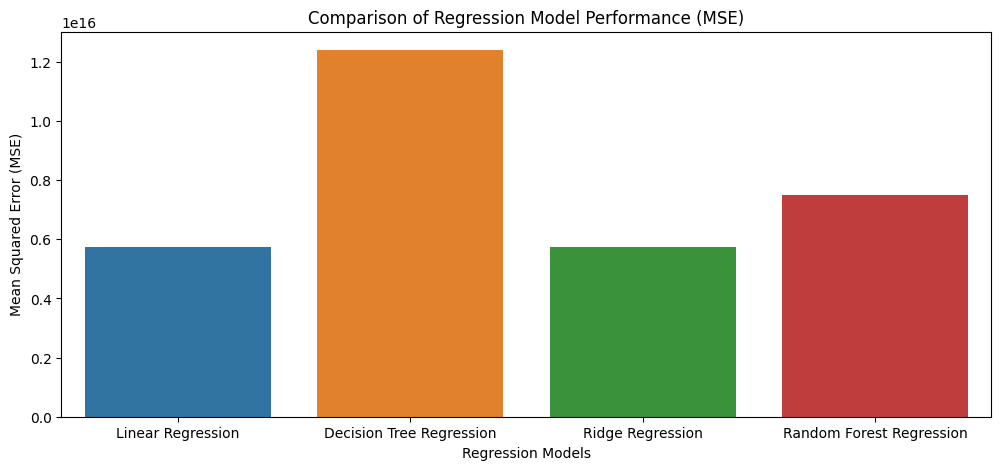

In [167]:
plt.figure(figsize=(12, 5))
sns.barplot(data=performance_df, x=performance_df.index, y='MSE')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Model Performance (MSE)')
plt.show()

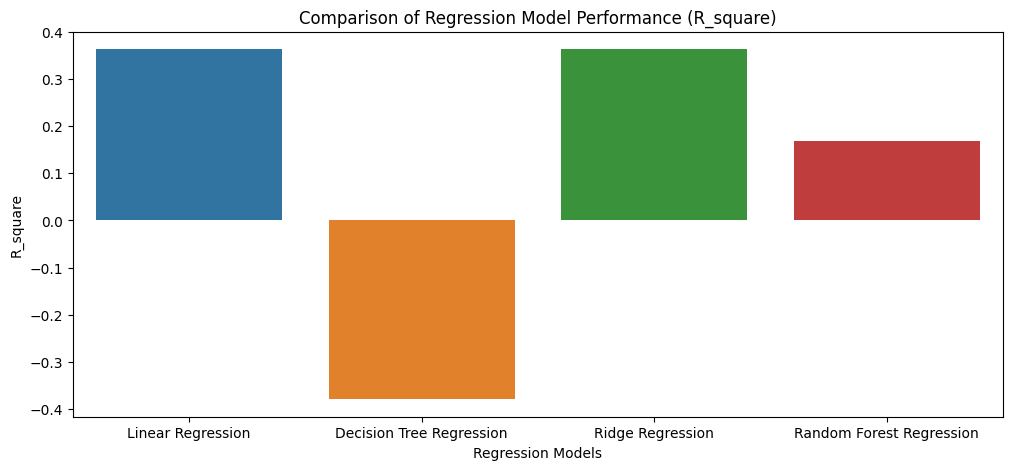

In [168]:
plt.figure(figsize=(12, 5))
sns.barplot(data=performance_df, x=performance_df.index, y='R_square')
plt.xlabel('Regression Models')
plt.ylabel('R_square')
plt.title('Comparison of Regression Model Performance (R_square)')
plt.show()

A residual is the difference between an observed value and a predicted value in regression analysis.

It is calculated as:

Residual = Observed value – Predicted value

In [169]:
# Calculate residuals for each model
linear_residuals = y_test - linear_y_pred
dtr_residuals = y_test - dtr_y_pred
ridge_residuals = y_test - reg_y_pred
rf_residuals = y_test - y_pred_rf

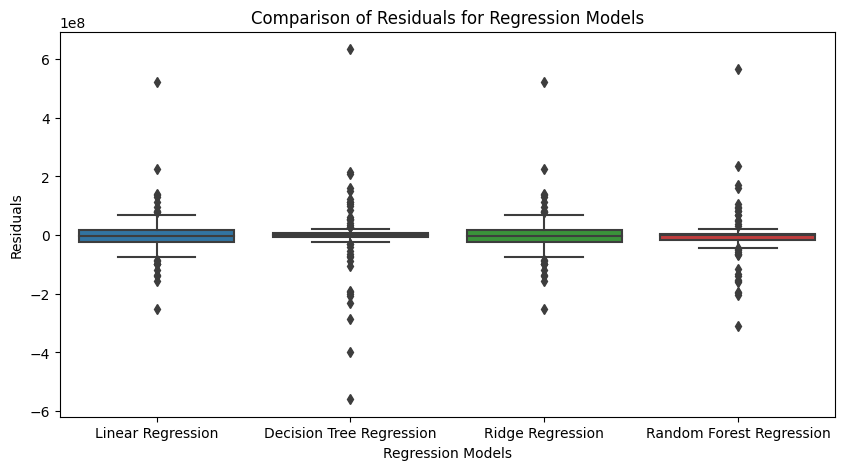

In [170]:
# Create a DataFrame to store residuals
residuals_df = pd.DataFrame({
    'Linear Regression': linear_residuals,
    'Decision Tree Regression': dtr_residuals,
    'Ridge Regression': ridge_residuals,
    'Random Forest Regression': rf_residuals
})

# Plot boxplots of residuals for each model
plt.figure(figsize=(10, 5))
sns.boxplot(data=residuals_df)
plt.xlabel('Regression Models')
plt.ylabel('Residuals')
plt.title('Comparison of Residuals for Regression Models')
plt.show()


=>  Rigde Regression Model is the best model to predict the movie gross. 

### Apply the Ridge Regression model to the dataset and compare the predicted values with the actual values

In [171]:
df_null_gross

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sunset Blvd.,1950,110.0,8.4,100.0,234110.0,NaN,Drama,Film-Noir,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Ordet,1955,126.0,8.2,100.0,17207.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,400 Cú Đấm,1959,99.0,8.1,100.0,126702.0,NaN,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Les enfants du paradis,1945,189.0,8.3,100.0,20960.0,NaN,Drama,Romance,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Jigokumon,1953,89.0,7.1,89.0,4197.0,NaN,Drama,History,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,Trudno byt bogom,2013,177.0,6.6,89.0,6288.0,NaN,Drama,Sci-Fi,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,NaN,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,NaN,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
features= ['Votes', 'Rating']

In [173]:
from sklearn import linear_model
# Create a Ridge regression model
reg= linear_model.Ridge(alpha= 0.5)


reg_model= reg.fit(X_train, y_train)
reg_y_pred= reg_model.predict(X_test)

ridge_r_square= r2_score(y_test, reg_y_pred)
ridge_mse= mean_squared_error(y_test, reg_y_pred)
ridge_mae= mean_absolute_error(y_test,reg_y_pred)

# Print the evaluation metrics
print("\nRidge Regression:")
print("Coefficient of determination: ", ridge_r_square)
print("Mean Square Error: ",ridge_mse)
print("Mean Absolue Error: ", ridge_mae)


Ridge Regression:
Coefficient of determination:  0.36338563290906045
Mean Square Error:  5724278586438484.0
Mean Absolue Error:  40237339.819526605


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


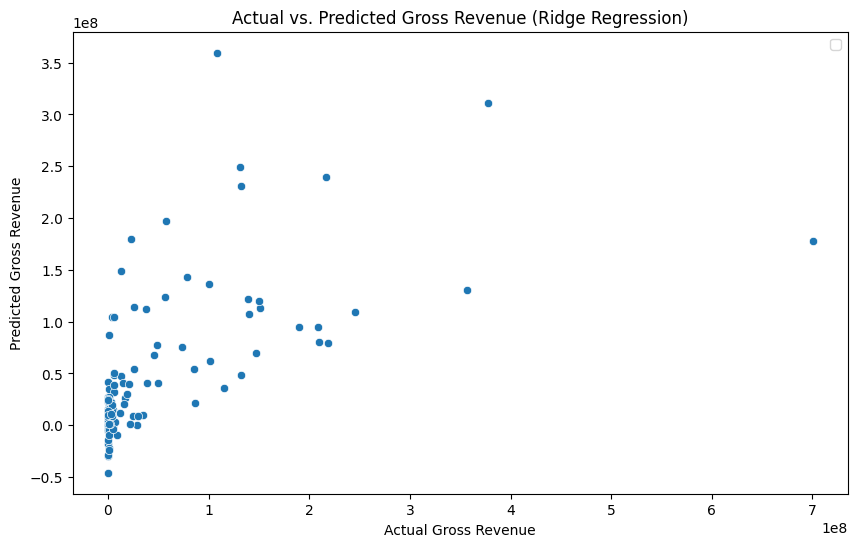

In [174]:
# Visualize the Ridge model: 
plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y= reg_y_pred)
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.title('Actual vs. Predicted Gross Revenue (Ridge Regression)')
plt.legend()
plt.show()

In [175]:
X_null_gross= df_null_gross[features]

In [176]:
# Standardize the features: 
scaler= StandardScaler()
X_null_scaled= scaler.fit_transform(X_null_gross)


In [177]:
# Make prediction apply Ridge model: 
reg_y_pred = reg_model.predict(X_null_scaled)

In [178]:
# Assign predicted value to Gross column: 
df_null_gross['Gross'] = reg_y_pred

In [179]:
df_null_gross

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,8.842875e+07,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sunset Blvd.,1950,110.0,8.4,100.0,234110.0,3.337052e+08,Drama,Film-Noir,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Ordet,1955,126.0,8.2,100.0,17207.0,5.278468e+06,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,400 Cú Đấm,1959,99.0,8.1,100.0,126702.0,1.807316e+08,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Les enfants du paradis,1945,189.0,8.3,100.0,20960.0,6.320710e+06,Drama,Romance,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Jigokumon,1953,89.0,7.1,89.0,4197.0,3.787688e+07,Drama,History,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,Trudno byt bogom,2013,177.0,6.6,89.0,6288.0,6.516945e+07,Drama,Sci-Fi,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,6.301757e+07,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,4.072150e+07,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Công Dân Kane,1941,119.0,8.3,100.0,462045.0,1585634.0,Drama,Mystery,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,Ilo Ilo,2013,99.0,7.2,89.0,4968.0,54071.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
990,Shazam!,2019,132.0,7.0,89.0,380610.0,140371656.0,Action,Adventure,Comedy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,Heart of a Dog,2015,75.0,7.0,89.0,2530.0,418571.0,Documentary,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,L'eau froide,1994,95.0,7.0,89.0,2188.0,30209.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# Combine null and not null dataset together: 
completed_df = pd.concat([df, df_null_gross], ignore_index= True)
completed_df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,1.349664e+08,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,2.690610e+05,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,5.730000e+07,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1.024560e+06,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Công Dân Kane,1941,119.0,8.3,100.0,462045.0,1.585634e+06,Drama,Mystery,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jigokumon,1953,89.0,7.1,89.0,4197.0,3.787688e+07,Drama,History,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,Trudno byt bogom,2013,177.0,6.6,89.0,6288.0,6.516945e+07,Drama,Sci-Fi,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,6.301757e+07,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,4.072150e+07,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Download file csv to visualize in PowerBI:

In [182]:
printed_df= completed_df[['MovieTitle', 'ReleaseYear', 'Duration', 'Rating', 'Metascore', 'Votes', 'Gross']]
printed_df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,1.349664e+08
1,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,2.690610e+05
2,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,5.730000e+07
3,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1.024560e+06
4,Công Dân Kane,1941,119.0,8.3,100.0,462045.0,1.585634e+06
...,...,...,...,...,...,...,...
995,Jigokumon,1953,89.0,7.1,89.0,4197.0,3.787688e+07
996,Trudno byt bogom,2013,177.0,6.6,89.0,6288.0,6.516945e+07
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,6.301757e+07
998,Moonrise,1948,90.0,7.0,89.0,2938.0,4.072150e+07


In [183]:
# Save as CSV files: 
printed_df.to_csv('printed_df.csv', index= False)